<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [0]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

In [0]:
y = x.pow(2)+0.2*torch.rand(x.size())

In [0]:
x,y = Variable(x),Variable(y)

In [0]:
plt.ion()

In [0]:
class Net(torch.nn.Module):
  def __init__(self,n_feature,n_hidden,n_output):
    super(Net,self).__init__()
    self.hidden = torch.nn.Linear(n_feature,n_hidden)
    self.predict = torch.nn.Linear(n_hidden,n_output)

  def forward(self,x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x




In [0]:
net = Net(1,10,1)

In [0]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()

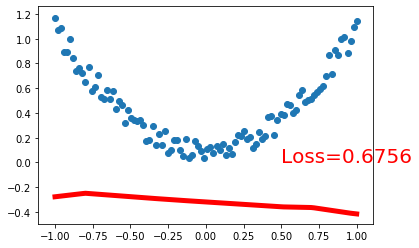

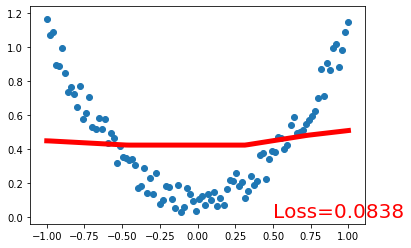

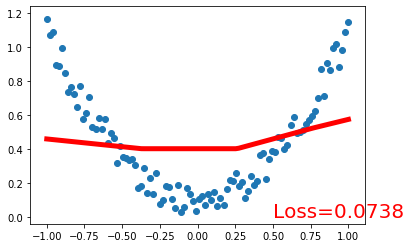

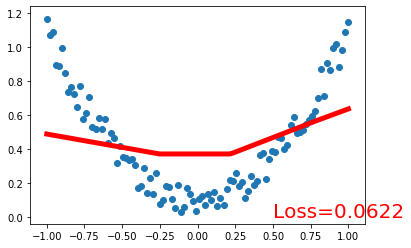

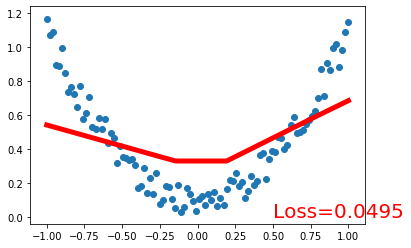

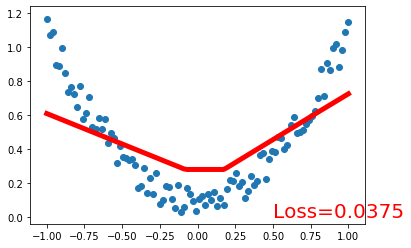

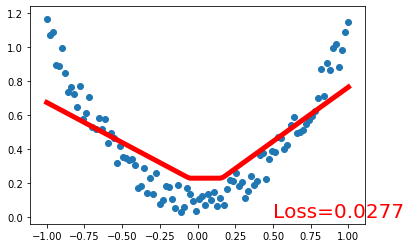

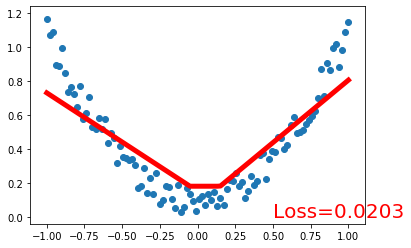

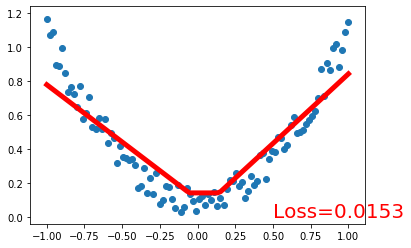

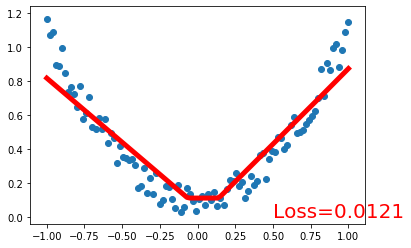

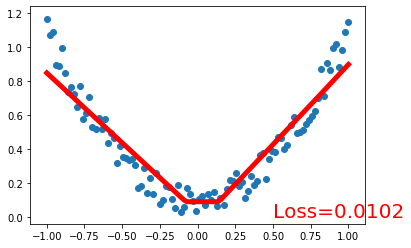

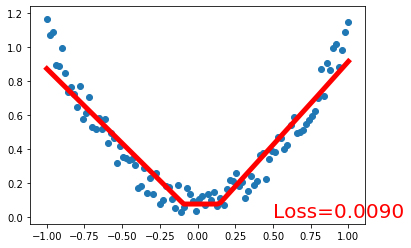

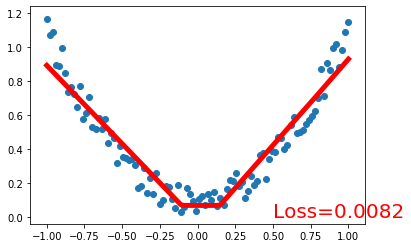

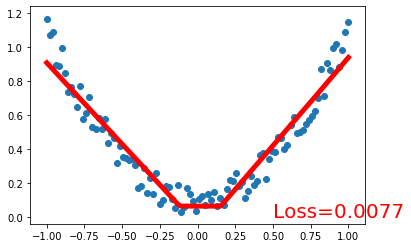

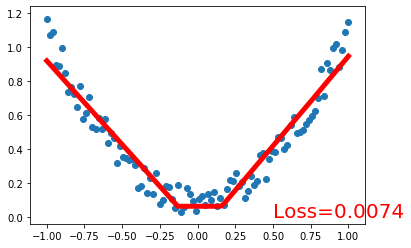

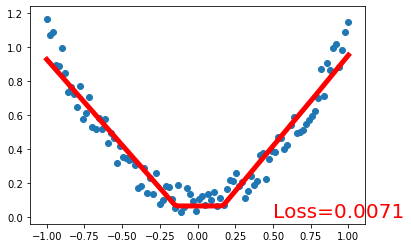

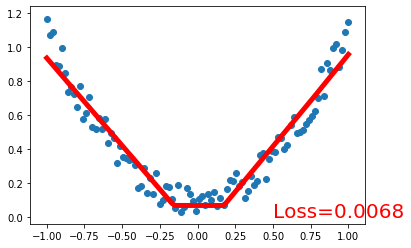

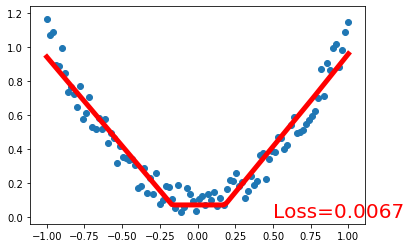

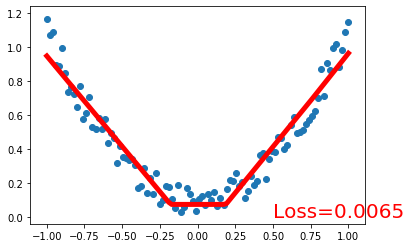

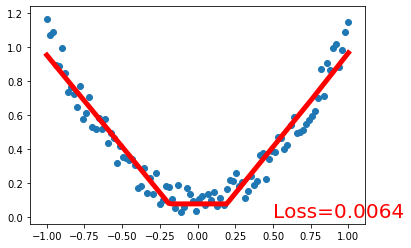

In [0]:
for t in range(100):
  prediction = net(x)
  loss = loss_func(prediction,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if t % 5 == 0:
    plt.cla()
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    plt.text(0.5,0,'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20,'color':'red'})
    plt.pause(0.1)

plt.ioff()
plt.show()
